# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from pprint import pprint 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)



In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print ("Begining Data Retrieval")

# URL format: api.openweathermap.org/data/2.5/weather?APPID={APIKEY}&q={city name}
url = 'http://api.openweathermap.org/data/2.5/weather?APPID='
count = 1
set_number = 1

#List to hold the weather details of a city
weather_data = []


for city in cities:
    #build the query URL
    query_url = url + api_key + "&q=" + city
        
    try:
        #retrive the response and JSONify it.
        response = requests.get(query_url).json()
 
        print (f"Processing Record {count} of Set {set_number} | {city}")
    
        #create a temp dictionary to hold the variables of interest
        city_weather = {}
        city_weather['City'] = response['name']
        city_weather['Cloudiness'] = response['clouds']['all']
        city_weather['Country'] = response['sys']['country']
        city_weather['Date'] = response['dt']
        city_weather['Humidity'] = response['main']['humidity']
        city_weather['Lat'] = response['coord']['lat']
        city_weather['Lng'] = response['coord']['lon']
        city_weather['Max Temp'] = response['main']['temp_max']
        city_weather['Wind Speed'] = response['wind']['speed']
    
        #Append the dictionary to the weather_data list
        weather_data.append(city_weather)
        
        
        if (count == 50): #if 50 records are saved, then reset count & incrment set_number
            print("reset count and increment set number")
            count = 1
            set_number = set_number + 1
        else:
            count = count +1 
            

            
    except KeyError:
        print ("City not found. Skipping")
        count = count + 1

Begining Data Retrieval
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | constitucion
Processing Record 5 of Set 1 | trelew
Processing Record 6 of Set 1 | kavieng
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | storforshei
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | nago
Processing Record 12 of Set 1 | victor harbor
Processing Record 13 of Set 1 | isangel
Processing Record 14 of Set 1 | kaitangata
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | morant bay
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | stromness
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | new norfolk
Processing Record 23 of Set 1 | pyaozerskiy
Processing Record 24 of S

Processing Record 38 of Set 4 | karratha
Processing Record 39 of Set 4 | trairi
Processing Record 40 of Set 4 | longyearbyen
Processing Record 41 of Set 4 | mayumba
Processing Record 42 of Set 4 | phan thiet
Processing Record 43 of Set 4 | grand river south east
City not found. Skipping
Processing Record 44 of Set 4 | lasa
Processing Record 45 of Set 4 | meybod
Processing Record 46 of Set 4 | yenotayevka
Processing Record 47 of Set 4 | great bend
Processing Record 48 of Set 4 | sao felix do xingu
Processing Record 49 of Set 4 | barentsburg
City not found. Skipping
Processing Record 50 of Set 4 | beringovskiy
reset count and increment set number
Processing Record 1 of Set 5 | port hedland
Processing Record 2 of Set 5 | berlevag
Processing Record 3 of Set 5 | kapaa
Processing Record 4 of Set 5 | flinders
Processing Record 5 of Set 5 | fare
Processing Record 6 of Set 5 | tangzhai
Processing Record 7 of Set 5 | tura
Processing Record 8 of Set 5 | benguela
Processing Record 9 of Set 5 | ser

Processing Record 21 of Set 8 | rassvet
Processing Record 22 of Set 8 | dryden
Processing Record 23 of Set 8 | utiroa
City not found. Skipping
Processing Record 24 of Set 8 | skalistyy
City not found. Skipping
Processing Record 25 of Set 8 | phalaborwa
Processing Record 26 of Set 8 | olafsvik
City not found. Skipping
Processing Record 27 of Set 8 | makaha
Processing Record 28 of Set 8 | korla
City not found. Skipping
Processing Record 29 of Set 8 | barvinkove
Processing Record 30 of Set 8 | halalo
City not found. Skipping
Processing Record 31 of Set 8 | athabasca
Processing Record 32 of Set 8 | jasper
Processing Record 33 of Set 8 | bargal
City not found. Skipping
Processing Record 34 of Set 8 | lakes entrance
Processing Record 35 of Set 8 | shepsi
Processing Record 36 of Set 8 | graaff-reinet
Processing Record 37 of Set 8 | asau
City not found. Skipping
Processing Record 38 of Set 8 | bambous virieux
Processing Record 39 of Set 8 | amahai
Processing Record 40 of Set 8 | portland
Proce

Processing Record 1 of Set 12 | bokoro
City not found. Skipping
Processing Record 2 of Set 12 | duluth
Processing Record 3 of Set 12 | olinda
Processing Record 4 of Set 12 | hobyo
Processing Record 5 of Set 12 | buenos aires
Processing Record 6 of Set 12 | opuwo
Processing Record 7 of Set 12 | bauchi
Processing Record 8 of Set 12 | christchurch
Processing Record 9 of Set 12 | margate
Processing Record 10 of Set 12 | kirovsk
Processing Record 11 of Set 12 | sapao
City not found. Skipping
Processing Record 12 of Set 12 | baykit
Processing Record 13 of Set 12 | mrirt
City not found. Skipping
Processing Record 14 of Set 12 | formoso do araguaia
City not found. Skipping
Processing Record 15 of Set 12 | umzimvubu
City not found. Skipping
Processing Record 16 of Set 12 | altamira
Processing Record 17 of Set 12 | camp verde
Processing Record 18 of Set 12 | beisfjord
Processing Record 19 of Set 12 | turbat
Processing Record 20 of Set 12 | saldanha
Processing Record 21 of Set 12 | sorland
Proces

In [5]:
print (len(weather_data))

561


In [6]:
#convert to dataframe
city_weather_df = pd.DataFrame(weather_data, index=range(0, len(weather_data), 1))


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
print(city_weather_df.count())

#write to CSV
city_weather_df.to_csv("../output_data/cities_weather.csv")

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64


In [8]:
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bredasdorp,0,ZA,1541660400,68,-34.53,20.04,292.150,3.60
1,Mahebourg,40,MU,1541660400,65,-20.41,57.70,301.150,6.70
2,Nikolskoye,90,RU,1541660400,93,59.70,30.79,277.150,2.00
3,Constitucion,0,MX,1541662684,78,23.99,-104.67,280.388,1.51
4,Trelew,56,AR,1541662924,37,-43.25,-65.31,290.138,2.91


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

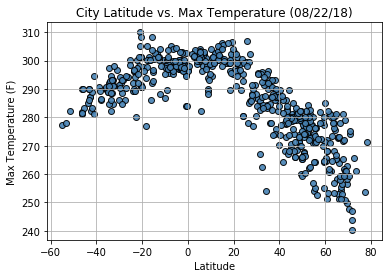

In [10]:
plt.scatter(city_weather_df['Lat'], city_weather_df['Max Temp'], 
         color='steelblue', marker="o", edgecolors="black", alpha="0.9")
plt.grid(axis='both')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (08/22/18)")

plt.savefig("../output_data/Latitude_Vs_MaxTemperature.png")

plt.show()

#### Latitude vs. Humidity Plot

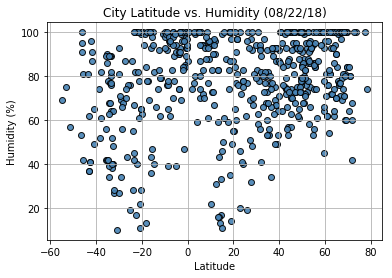

In [11]:
plt.scatter(city_weather_df['Lat'], city_weather_df['Humidity'], 
         color='steelblue', marker="o", edgecolors="black", alpha="0.9")
plt.grid(axis='both')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (08/22/18)")


plt.savefig("../output_data/Latitude_Vs_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

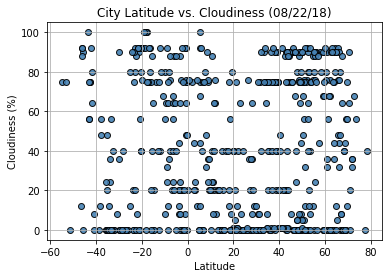

In [12]:
plt.scatter(city_weather_df['Lat'], city_weather_df['Cloudiness'], 
         color='steelblue', marker="o", edgecolors="black", alpha="0.9")
plt.grid(axis='both')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (08/22/18)")


plt.savefig("../output_data/Latitude_Vs_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

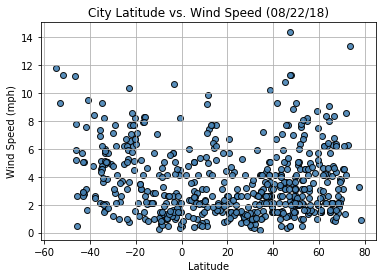

In [13]:
plt.scatter(city_weather_df['Lat'], city_weather_df['Wind Speed'], 
         color='steelblue', marker="o", edgecolors="black", alpha="0.9")
plt.grid(axis='both')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (08/22/18)")


plt.savefig("../output_data/Latitude_Vs_WindSpeed.png")

plt.show()